In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,x,y,z,t
0,0.108610,0.901637,3.495175,5.548247
1,1.441267,1.666423,3.554596,-3.839294
2,-0.492374,0.112673,3.902964,13.713320
3,1.106691,0.754194,3.447355,8.432243
4,1.553509,3.087109,3.756501,-1.373107


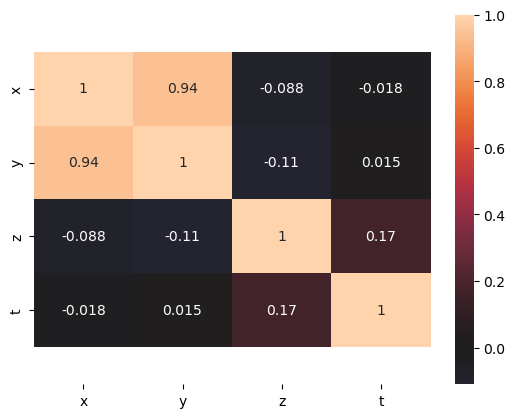

In [3]:
sns.heatmap(df.corr(), center=0, annot=True)
bottom, top = plt.ylim()
plt.ylim(bottom + 0.5, top - 0.5)
plt.show()

From this output, we see that attributes 'x' and 'y' have a correlation coefficient that is quite high: 0.94.

